In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()

Saving nyc-rolling-sales.csv to nyc-rolling-sales.csv


In [8]:
nyc = pd.read_csv('nyc-rolling-sales.csv')
nyc.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  ...  \
0    6                                  C2            153 AVENUE B  ...   
1   26                                  C7   234 EAST 4TH   STREET  ...   
2   39                                  C7   197 EAST 3RD   STREET  ...   
3   21                                  C4     154 EAST 7TH STREET  ...   
4   55                                  C2  301 EAST 10TH   STREET  ...   

  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                 5                 0            5              1633   
1                28                 3           31              4616   
2                16                 1           17              2212   
3                10                 0           10              2272   
4                 6                 0            6              2369   

   GROSS SQUARE FEET YEAR BUILT TAX CLASS AT TIME OF SALE  \
0               6440       1900                         2   
1              18690       1900                         2   
2               7803       1900                         2   
3               6794       1913                         2   
4               4615       1900                         2   

   BUILDING CLASS AT TIME OF SALE  SALE PRICE            SALE DATE  
0                              C2     6625000  2017-07-19 00:00:00  
1                              C7         -    2016-12-14 00:00:00  
2                              C7         -    2016-12-09 00:00:00  
3                              C4     3936272  2016-09-23 00:00:00  
4                              C2     8000000  2016-11-17 00:00:00  

[5 rows x 22 columns]

In [13]:
#Data Exploration
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [14]:
nyc.describe()

Unnamed: 0       BOROUGH         BLOCK           LOT      ZIP CODE  \
count  84548.000000  84548.000000  84548.000000  84548.000000  84548.000000   
mean   10344.359878      2.998758   4237.218976    376.224015  10731.991614   
std     7151.779436      1.289790   3568.263407    658.136814   1290.879147   
min        4.000000      1.000000      1.000000      1.000000      0.000000   
25%     4231.000000      2.000000   1322.750000     22.000000  10305.000000   
50%     8942.000000      3.000000   3311.000000     50.000000  11209.000000   
75%    15987.250000      4.000000   6281.000000   1001.000000  11357.000000   
max    26739.000000      5.000000  16322.000000   9106.000000  11694.000000   

       RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS    YEAR BUILT  \
count       84548.000000      84548.000000  84548.000000  84548.000000   
mean            2.025264          0.193559      2.249184   1789.322976   
std            16.721037          8.713183     18.972584    537.344993   
min             0.000000          0.000000      0.000000      0.000000   
25%             0.000000          0.000000      1.000000   1920.000000   
50%             1.000000          0.000000      1.000000   1940.000000   
75%             2.000000          0.000000      2.000000   1965.000000   
max          1844.000000       2261.000000   2261.000000   2017.000000   

       TAX CLASS AT TIME OF SALE  
count               84548.000000  
mean                    1.657485  
std                     0.819341  
min                     1.000000  
25%                     1.000000  
50%                     2.000000  
75%                     2.000000  
max                     4.000000

In [15]:
unique_values = {col: nyc[col].unique() for col in nyc.columns if nyc[col].dtype == 'O'}
print(unique_values)

{'NEIGHBORHOOD': array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
       'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
       'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
       'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
       'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER', 'BATHGATE',
       'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONX PARK',
       'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
       'CITY ISLAND-PELHAM STRIP', 'CO-OP CITY', 'COU

In [16]:
#Data Cleaning
#Missing Values
print("Missing Values:")
print(nyc.isnull().sum())

Missing Values:
Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64


In [17]:
#Duplicate Rows
print("Duplicate Rows:")
print(nyc.duplicated().sum())

Duplicate Rows:
0


In [18]:
#Descriptive Statistics
print(f'Mean: {nyc["TOTAL UNITS"].mean()}')
print(f'Median: {nyc["TOTAL UNITS"].median()}')
print(f'Mode: {nyc["TOTAL UNITS"].mode().iloc[0]}')
print(f'Q1: {nyc["TOTAL UNITS"].quantile(0.25)}')
print(f'Q2: {nyc["TOTAL UNITS"].quantile(0.50)}')
print(f'Q3: {nyc["TOTAL UNITS"].quantile(0.75)}')
print(f'Range: {nyc["TOTAL UNITS"].max() - nyc["TOTAL UNITS"].min()}')
print(f'Variance: {nyc["TOTAL UNITS"].var()}')
print(f'Standard Deviation: {nyc["TOTAL UNITS"].std()}')

Mean: 2.249183895538629
Median: 1.0
Mode: 1
Q1: 1.0
Q2: 1.0
Q3: 2.0
Range: 2261
Variance: 359.958960030383
Standard Deviation: 18.97258443202673


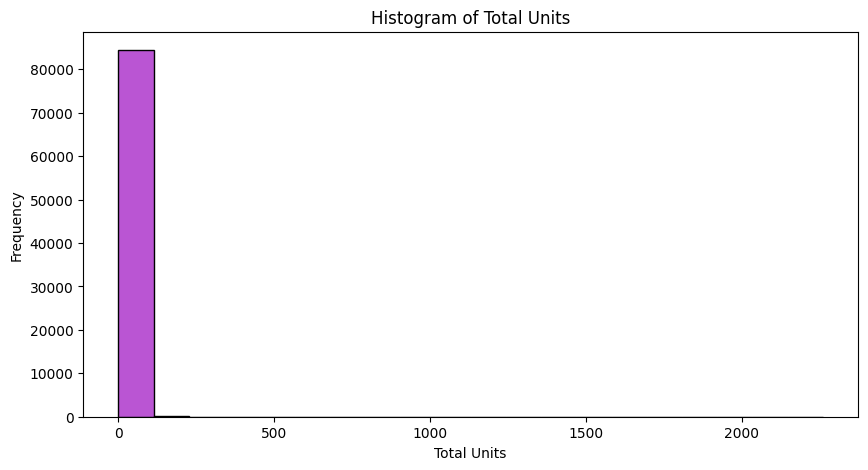

In [19]:
plt.figure(figsize=(10, 5))
nyc['TOTAL UNITS'].plot(kind='hist', bins=20, color='mediumorchid', edgecolor='black')
plt.title('Histogram of Total Units')
plt.xlabel('Total Units')
plt.ylabel('Frequency')
plt.show()

In [20]:
#Confidence Interval
from statsmodels.stats.weightstats import zconfint

In [21]:
confidence_interval = zconfint(nyc['TOTAL UNITS'].dropna())
print(f'Confidence Interval for the Mean: {confidence_interval}')

Confidence Interval for the Mean: (2.1212979214279692, 2.3770698696492887)


In [22]:
#Hypothesis Testing
from scipy.stats import ttest_1samp

In [23]:
t_stat, p_value = ttest_1samp(nyc['TOTAL UNITS'].dropna(), 10)
print(f'T-Test Statistics: {t_stat}, p-value: {p_value}')

if p_value < 0.05:
    print('There is a significant difference in the mean total units.')
else:
    print('There is no significant difference in the mean total units.')

T-Test Statistics: -118.78801034421694, p-value: 0.0
There is a significant difference in the mean total units.
